# Activity 2

# Overview

- In this code, I parsed a csv file of data into a two-dimensional dictionary. Each key within the main dictionary represents a year and its value holds a second dictionary that contains the statistics for that year. Once we parsed this data, we calculated the total percent of each gender or ethnicity and plotted them in their relevant graphs using two seperate plot functions. Besides learning a lot about python during this process, I also confirmed a fact that I personally see in my daily life: Computer Science is dominated by Caucasian men. My main takeaway is that over the years minorities and women have slowly made gains in Computer Science, and hopefully will populate the field more evenly within the next decade.

# Methodology

- As stated in the overview, the code requested a .csv file from a URL and parsed this data by using a two-dimensional dictionary. It then graphed the data.
1) In the load_data function, the function makes and the request and saves the data. We split each line individually and analyze the data. First, we split the first line by ',,' and add each of these values into our main dictionary. Then, we traverse each year using enumerate and add to its value. To do this, we split the statistics for a row into a list loop through each one, incrementing its key's count.
2) The plot_gender_pct calculates the percentage of each gender by dividing the count of each gender by the total of them all. Then it plots this information using a bar graph.
3) The plot_ethnicity_pct calculates the percentage of each ethnicity by dividing the count of each ethnicity by the total of them all. Then it plots this information using a stack plot.

In [304]:
%matplotlib inline 

In [305]:
# Imports

import collections
import requests
import matplotlib.pyplot as plt

In [306]:
DATA_URL = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv'

In [307]:
def load_data(url=DATA_URL):
    ''' Loads CSV data from URL '''
    
    # Fetch data from URL
    data_list = {}
    response  = requests.get(url)
    lines = response.text.splitlines()
    for datum in lines[0].split(',,'):
        data_list[datum] = {}
    
    
    
    # For each line, split by commas and convert items into a float
    for row in lines[1:]:
        row_data = row.split(',')
        for tracker, data in enumerate(data_list.keys()): 
            if row_data[2*tracker] not in data_list[data]:
                data_list[data][row_data[2*tracker]] = 0
            else:
                data_list[data][row_data[2*tracker]] += 1 
            if row_data[2*tracker + 1] not in data_list[data]:
                data_list[data][row_data[2*tracker + 1]] = 0
            else:
                data_list[data][row_data[2*tracker + 1]] +=1
        
    return data_list

In [308]:
import matplotlib.pyplot as plt

def plot_gender_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years   = sorted(data.keys())
    males   = []
    females = []
    for year in years:
        m = data[year]['M']
        f = data[year]['F']
        t = m + f
        males.append(m * 100.0 / t)
        females.append(f * 100.0 / t)

    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title('Gender in Engineering 2013-2018')
    ax.bar(years, females, color='r', label='Female')
    ax.bar(years, males, bottom=females, color='b', label='Male')

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [309]:
import numpy as np

def plot_ethnicity_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years = sorted(data.keys())
    cauc   = []
    asian = []
    hispanic = []
    black = []
    native = []
    multiple = []
    undeclared = []
    count = 0
    for year in years:
            c = data[year]['C']
            asi = data[year]['O']
            h = data[year]['S']
            af = data[year]['B']
            na = data[year]['N']
            if 'T' in data[year]:
                m = data[year]['T']
            if 'U' in data[year]:
                u = data[year]['U']
                t = c + asi + h + af + na + m + u
                cauc.append(c * 100.0 / t)
                asian.append(asi * 100.0 / t)
                hispanic.append(h * 100.0 / t)
                black.append(af * 100.0 / t)
                native.append(na * 100.0 / t)
                multiple.append(m * 100.0 / t)
                undeclared.append(u * 100.0 / t)
            else:
                t = c + asi + h + af + na + m
                cauc.append(c * 100.0 / t)
                asian.append(asi * 100.0 / t)
                hispanic.append(h * 100.0 / t)
                black.append(af * 100.0 / t)
                native.append(na * 100.0 / t)
                multiple.append(m * 100.0 / t)
                undeclared.append(0)
        
    plt.plot([],[],color='m', label='Caucasian', linewidth=5)
    plt.plot([],[],color='c', label='Asian', linewidth=5)
    plt.plot([],[],color='r', label='Hispanic', linewidth=5)
    plt.plot([],[],color='k', label='African American', linewidth=5)
    plt.plot([],[],color='b', label='Native American', linewidth=5)
    plt.plot([],[],color='y', label='Multiple Selection', linewidth=5)
    plt.plot([],[],color='g', label='Undeclared', linewidth=5)

    plt.stackplot(years, cauc,asian,hispanic,black,native,multiple,undeclared, colors=['m','c','r','k','b','y','g'])

    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title('Ethnicities in Engineering 2013-2018')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

# Analysis

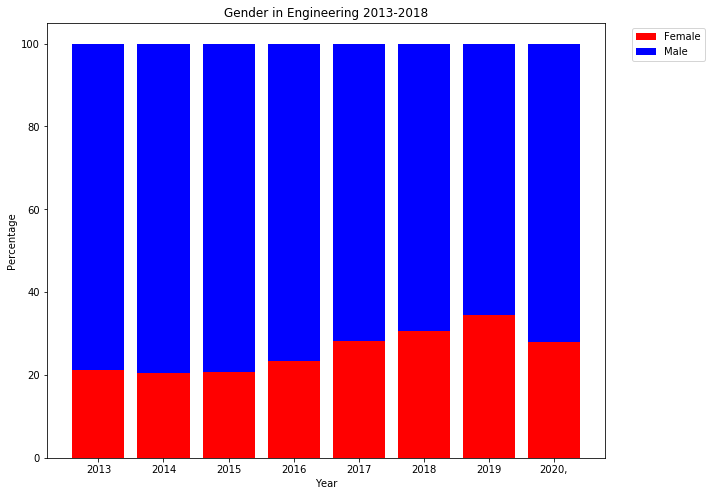

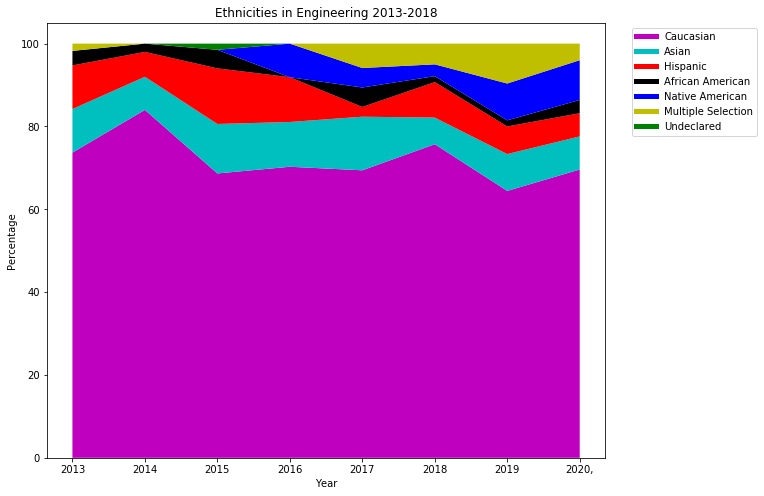

In [310]:
plot_gender_pct(load_data(DATA_URL))

Although there was a recent growth in female participation, over the years the field of Computer Science has been dominated by men. With a sleet decrease in women in 2020, the future of Computer Science may be headed in the wrong direction.

In [ ]:
plot_ethnicity_pct(load_data(DATA_URL))

Similar to gender, caucasians have dominated Computer Science in the past with a slight increase of Asians, consistency by Hispanics and African Americans, and great increases in Native Americans.

# Discussion

- The issues of gender and ethnic diversity are important to me because I am a Hispanic woman in Computer Science. Sometimes, it is overwhelming to be surrounded by such a non-diverse group of men. Even worse, I have often found that my male colleagues ignore my suggestions or become angry when I score higher than them on exams. This type of environment is disheartening for any engineer in any field. I don't think it is necessarily the department's job or the workplace's job to increase diversity. Change needs to be enacted at a younger level so that young girls can be encouraged to become engineers and young boys can learn to welcome them as equals. However when trying to face the problem now in the department and in the workplace, we don't have to favor minorites or women. We just have to make them feel equal in intelligence and value because at times, many of them feel like they are trying to play catch up right out of the gate and a toxic environment will not encourage them to grow as engineers.